## TensorFlow(Keras)を使った学習

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(x, y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.8)
target_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

input_shape = (train_x.shape[1], train_x.shape[2], 1)

In [4]:
type(x)

numpy.ndarray

In [5]:
x.shape

(60000, 28, 28)

In [6]:
type(y)

numpy.ndarray

In [7]:
y.shape

(60000,)

In [25]:
keras_model = keras.Sequential(name='test_model')
keras_model.add(keras.layers.InputLayer(input_shape))
keras_model.add(keras.layers.Flatten(name='Flatten'))
keras_model.add(keras.layers.Dense(128, activation='relu', name='Dense'))
keras_model.add(keras.layers.Dropout(0.2, name='Dropout'))
keras_model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

In [26]:
keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = keras_model.fit(train_x, train_y, epochs=20, validation_data=(val_x, val_y))
history

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5433 - loss: 9.5112 - val_accuracy: 0.6575 - val_loss: 0.9235
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6405 - loss: 0.9905 - val_accuracy: 0.6206 - val_loss: 0.9362
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6168 - loss: 0.9652 - val_accuracy: 0.7546 - val_loss: 0.6874
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6763 - loss: 0.8539 - val_accuracy: 0.7377 - val_loss: 0.7001
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6551 - loss: 0.9269 - val_accuracy: 0.7675 - val_loss: 0.6222
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6888 - loss: 0.8260 - val_accuracy: 0.7498 - val_loss: 0.6879
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6982 - loss: 0.8008 - val_accuracy: 0.7787 - val_loss: 0.6090
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6912 - loss: 0.7955 - 

In [46]:
keras_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7570 - loss: 0.6744


[0.6717014908790588, 0.760699987411499]

In [48]:
keras_model.export('models/fashion_mnist_model')

INFO:tensorflow:Assets written to: models/fashion_mnist_model/assets


INFO:tensorflow:Assets written to: models/fashion_mnist_model/assets


Saved artifact at 'models/fashion_mnist_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13278971472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13257168592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13257166672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13257162832: TensorSpec(shape=(), dtype=tf.resource, name=None)


## TensorFlow Liteを使った推論

In [50]:
conv = tf.lite.TFLiteConverter.from_saved_model('models/fashion_mnist_model')
tflite_model = conv.convert()
with open('models/fashion_mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)

W0000 00:00:1717947220.948746 2531250 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1717947220.949088 2531250 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-06-10 00:33:40.950047: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: models/fashion_mnist_model
2024-06-10 00:33:40.950333: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-10 00:33:40.950339: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: models/fashion_mnist_model
2024-06-10 00:33:40.955335: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-06-10 00:33:40.975574: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: models/fashion_mnist_model
2024-06-10 00:33:40.979982: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 29937 microseconds.


In [51]:
interpreter = tf.lite.Interpreter('models/fashion_mnist_model.tflite')
interpreter.allocate_tensors()

In [52]:
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_keras_tensor_11:0',
  'index': 0,
  'shape': array([ 1, 28, 28,  1], dtype=int32),
  'shape_signature': array([-1, 28, 28,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [53]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 9,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [54]:
import numpy as np
import  matplotlib.pyplot as plt

In [59]:
input_data = test_x[0].reshape(1, 28, 28, 1)
input_data = np.array(input_data, dtype=np.float32)

In [60]:
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

In [61]:
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data

array([[3.2269969e-34, 5.5322687e-29, 0.0000000e+00, 1.6594056e-19,
        0.0000000e+00, 9.5771000e-02, 0.0000000e+00, 2.1838066e-01,
        1.6367754e-16, 6.8584830e-01]], dtype=float32)

In [72]:
[f"{v:.5f}" for v in output_data[0]]

['0.00000',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.09577',
 '0.00000',
 '0.21838',
 '0.00000',
 '0.68585']

In [66]:
np.argmax(output_data[0])

9

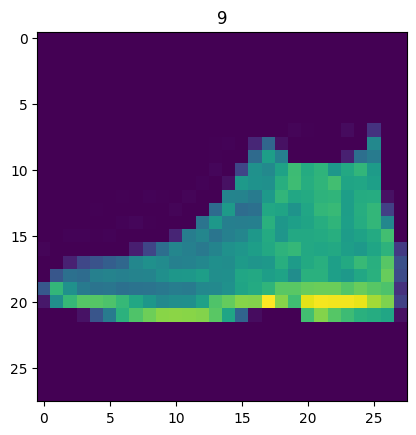

In [62]:
plt.title(test_y[0])
plt.imshow(test_x[0])